Data Cleaning 

In [ ]:
#Importing Libraries
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
#Loading the Sales Dataset
tr=pd.read_csv( 'E:/JN/DS/train.csv' , parse_dates=['Order Date','Ship Date'])

In [3]:
#Exploring Dataset Structure
tr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9800 entries, 0 to 9799
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Row ID         9800 non-null   int64  
 1   Order ID       9800 non-null   object 
 2   Order Date     9800 non-null   object 
 3   Ship Date      9800 non-null   object 
 4   Ship Mode      9800 non-null   object 
 5   Customer ID    9800 non-null   object 
 6   Customer Name  9800 non-null   object 
 7   Segment        9800 non-null   object 
 8   Country        9800 non-null   object 
 9   City           9800 non-null   object 
 10  State          9800 non-null   object 
 11  Postal Code    9789 non-null   float64
 12  Region         9800 non-null   object 
 13  Product ID     9800 non-null   object 
 14  Category       9800 non-null   object 
 15  Sub-Category   9800 non-null   object 
 16  Product Name   9800 non-null   object 
 17  Sales          9800 non-null   float64
dtypes: float

In [ ]:
tr.sample(10) #Random Data Sampling

In [4]:
tr['City'].value_counts() #Analyzing City Order Frequency

City
New York City        891
Los Angeles          728
Philadelphia         532
San Francisco        500
Seattle              426
                    ... 
Hagerstown             1
Arlington Heights      1
East Orange            1
San Luis Obispo        1
Springdale             1
Name: count, Length: 529, dtype: int64

In [5]:
tr = tr.drop(columns=['Postal Code']) #Dropping Redundant Column

In [6]:
tr.duplicated().sum()  #Ensures there are no duplicate rows in the dataset

np.int64(0)

In [7]:
#Ensures 'Order Date' and 'Ship Date' are correctly parsed as datetime
tr['Order Date'] = pd.to_datetime(tr["Order Date"], dayfirst=True, errors='coerce')
tr['Ship Date'] = pd.to_datetime(tr["Ship Date"], dayfirst=True, errors='coerce')
tr["ship_days"] = tr["Ship Date"] - tr["Order Date"]

In [8]:
tr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9800 entries, 0 to 9799
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype          
---  ------         --------------  -----          
 0   Row ID         9800 non-null   int64          
 1   Order ID       9800 non-null   object         
 2   Order Date     9800 non-null   datetime64[ns] 
 3   Ship Date      9800 non-null   datetime64[ns] 
 4   Ship Mode      9800 non-null   object         
 5   Customer ID    9800 non-null   object         
 6   Customer Name  9800 non-null   object         
 7   Segment        9800 non-null   object         
 8   Country        9800 non-null   object         
 9   City           9800 non-null   object         
 10  State          9800 non-null   object         
 11  Region         9800 non-null   object         
 12  Product ID     9800 non-null   object         
 13  Category       9800 non-null   object         
 14  Sub-Category   9800 non-null   object         
 15  Prod

In [9]:
#Adds columns for day, month, and year of orders 
tr["day_of_order"] = tr["Order Date"].dt.day_name()
tr['Month_of_order'] = tr['Order Date'].dt.month_name()
tr['Year_of_order'] = tr['Order Date'].dt.year
tr.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Region,Product ID,Category,Sub-Category,Product Name,Sales,ship_days,day_of_order,Month_of_order,Year_of_order
0,1,CA-2017-152156,2017-11-08,2017-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,3 days,Wednesday,November,2017
1,2,CA-2017-152156,2017-11-08,2017-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3 days,Wednesday,November,2017
2,3,CA-2017-138688,2017-06-12,2017-06-16,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,4 days,Monday,June,2017
3,4,US-2016-108966,2016-10-11,2016-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,7 days,Tuesday,October,2016
4,5,US-2016-108966,2016-10-11,2016-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,7 days,Tuesday,October,2016


In [10]:
#Listing Unique States
tr['State'].unique()

array(['Kentucky', 'California', 'Florida', 'North Carolina',
       'Washington', 'Texas', 'Wisconsin', 'Utah', 'Nebraska',
       'Pennsylvania', 'Illinois', 'Minnesota', 'Michigan', 'Delaware',
       'Indiana', 'New York', 'Arizona', 'Virginia', 'Tennessee',
       'Alabama', 'South Carolina', 'Oregon', 'Colorado', 'Iowa', 'Ohio',
       'Missouri', 'Oklahoma', 'New Mexico', 'Louisiana', 'Connecticut',
       'New Jersey', 'Massachusetts', 'Georgia', 'Nevada', 'Rhode Island',
       'Mississippi', 'Arkansas', 'Montana', 'New Hampshire', 'Maryland',
       'District of Columbia', 'Kansas', 'Vermont', 'Maine',
       'South Dakota', 'Idaho', 'North Dakota', 'Wyoming',
       'West Virginia'], dtype=object)

Exploratory Data Analysis(EDA)

<Figure size 800x400 with 0 Axes>

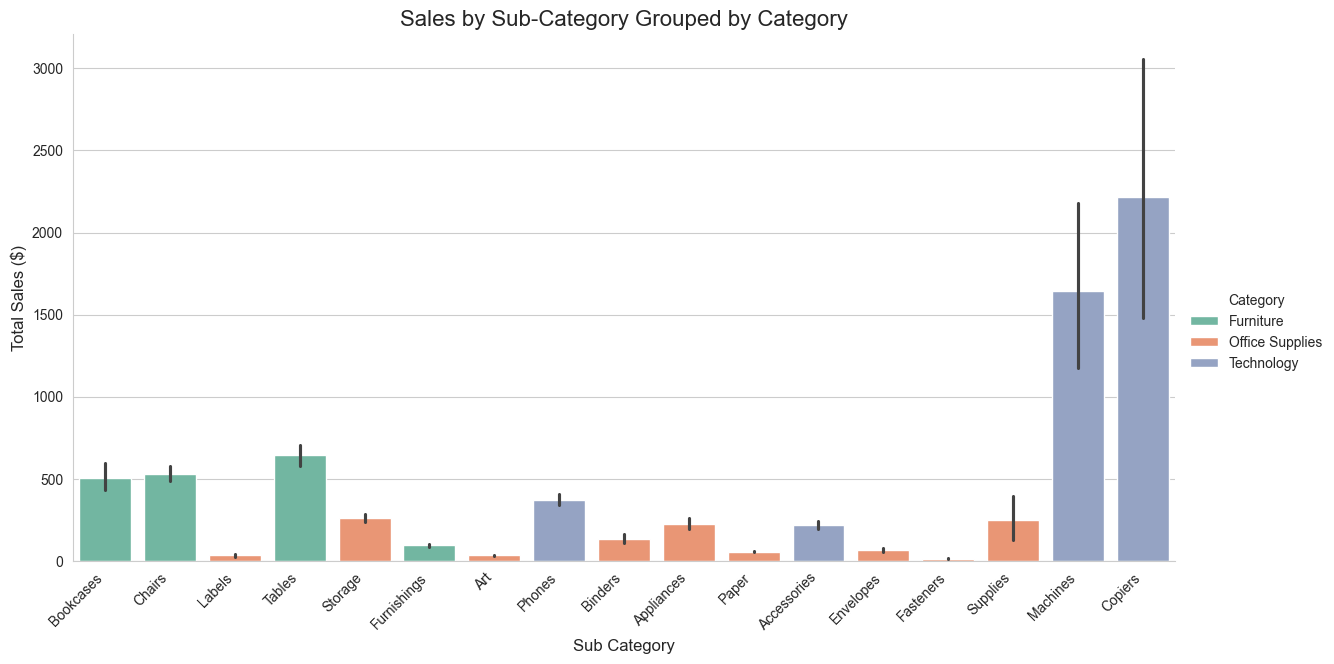

In [11]:
#Sales Analysis by Sub-Category and Category to Identify Top-Performing Products.
sns.set_style("whitegrid")
plt.figure(figsize=(8, 4))
sns.catplot(
    x="Sub-Category",        
    y="Sales",               
    hue="Category",           
    kind="bar",               
    data=tr,               
    height=6,                 
    aspect=2,                
    palette="Set2"          
)
plt.title("Sales by Sub-Category Grouped by Category", fontsize=16)
plt.xlabel("Sub Category", fontsize=12)
plt.ylabel("Total Sales ($)", fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.show()

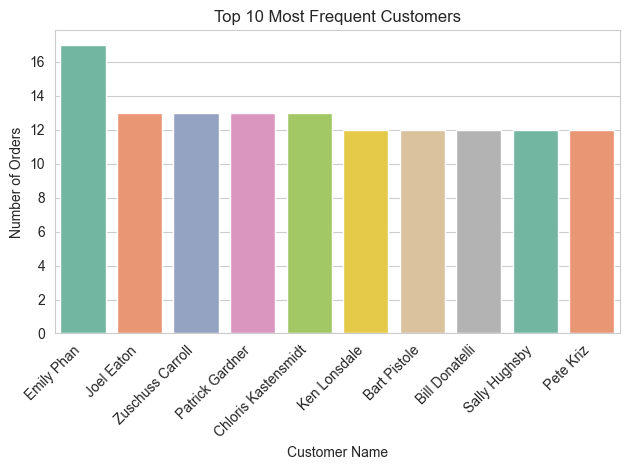

In [12]:
# Top 10 Repeat Customers Analyzing Order Frequency Sales Strategies
repeat_customers = tr.groupby('Customer Name').agg(
    Order_Count=('Order ID', 'nunique'),  
    Total_Sales=('Sales', 'sum')          
).reset_index()
repeat_customers = repeat_customers.sort_values(by='Order_Count', ascending=False)
top_customers = repeat_customers.head(10)
sns.barplot(
    x='Customer Name', 
    y='Order_Count',  
    data=top_customers ,
    palette="Set2"
)
plt.xticks(rotation=45, ha='right')
plt.title('Top 10 Most Frequent Customers')
plt.xlabel('Customer Name')
plt.ylabel('Number of Orders')
plt.tight_layout()
plt.show()

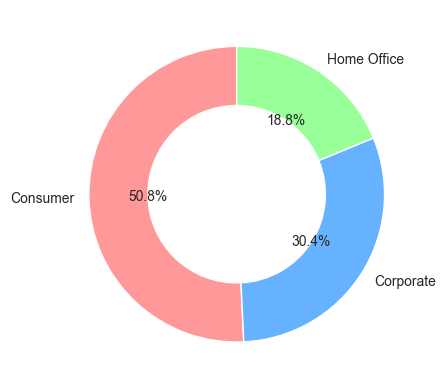

In [13]:
#Who Drives Your Business
sales_by_segment = tr.groupby('Segment')['Sales'].sum()
plt.pie(sales_by_segment, labels=sales_by_segment.index, autopct='%1.1f%%', startangle=90, 
        colors=['#FF9999', '#66B2FF', '#99FF99'], wedgeprops=dict(width=0.4))
plt.show()

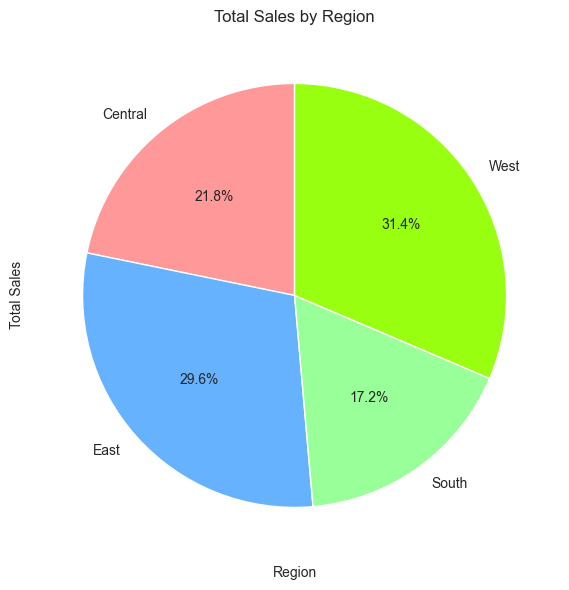

In [14]:
#Mapping Regional Sales Performance to Optimize Resource Allocation
plt.figure(figsize=(10, 6))
sales_by_states = tr.groupby('Region')['Sales'].sum()
plt.pie(sales_by_states, labels=sales_by_states.index, autopct='%1.1f%%', startangle=90, 
        colors=['#FF9999', '#66B2FF', '#99FF99','#99FF10'], wedgeprops=dict(width=1))
plt.title('Total Sales by Region')
plt.xlabel('Region')
plt.ylabel('Total Sales')
plt.tight_layout()
plt.show()

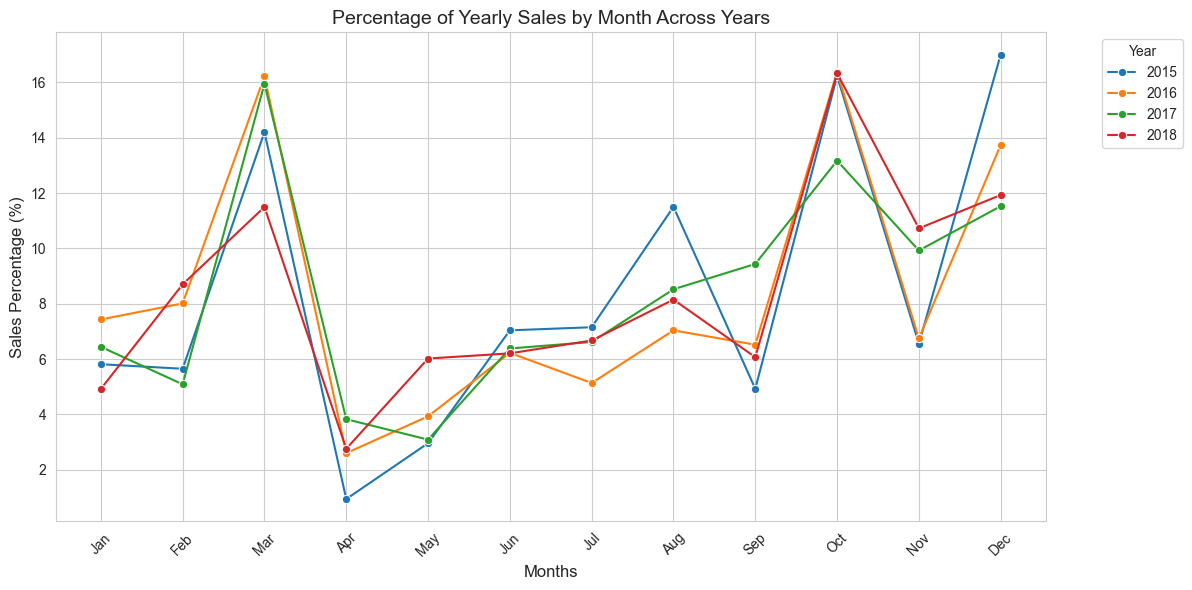

In [15]:
#Tracking Monthly Sales Trends: Identifying Seasonal Patterns to Optimize Inventory & Marketing
monthly_sales = tr.groupby(['Year_of_order', 'Month_of_order'])['Sales'].sum().reset_index()
yearly_totals = tr.groupby('Year_of_order')['Sales'].sum()
monthly_sales['Sales_Percentage'] = monthly_sales.apply(
    lambda row: (row['Sales'] / yearly_totals[row['Year_of_order']]) * 100, axis=1
)
plt.figure(figsize=(12, 6))
sns.lineplot(x='Month_of_order', y='Sales_Percentage', hue='Year_of_order', data=monthly_sales, palette='tab10', marker='o')
plt.title('Percentage of Yearly Sales by Month Across Years', fontsize=14)
plt.xlabel('Months', fontsize=12)
plt.ylabel('Sales Percentage (%)', fontsize=12)
plt.xticks(ticks=range(12), labels=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 
                                    'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'], rotation=45)
plt.legend(title='Year', bbox_to_anchor=(1.05, 1), loc='upper left')  

plt.tight_layout()
plt.show()

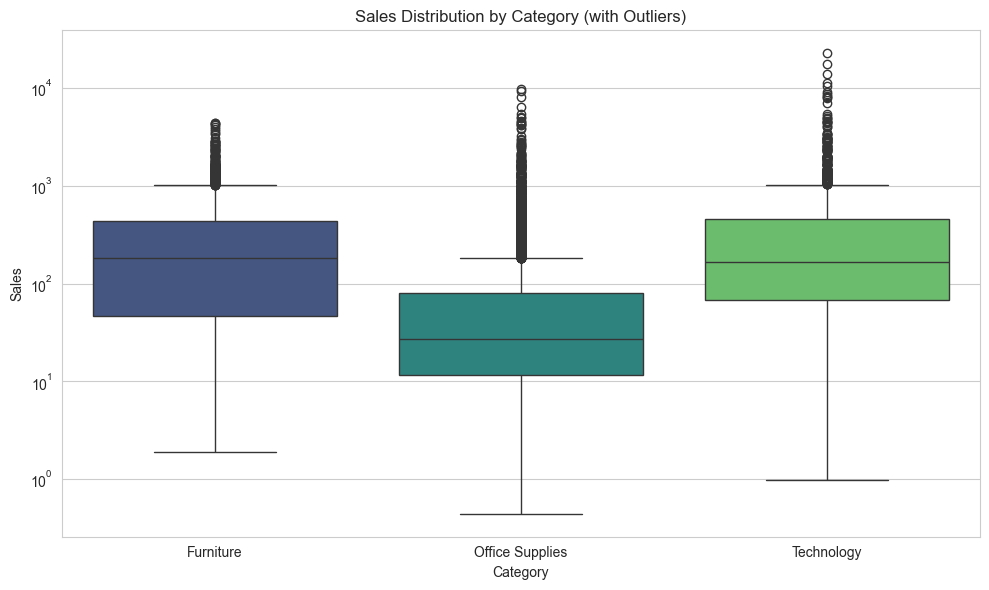

In [16]:
#Category Performance Gaps Demand Tailored Strategies
plt.figure(figsize=(10, 6))
sns.boxplot(x='Category', y='Sales', data=tr,palette='viridis')
plt.title('Sales Distribution by Category (with Outliers)')
plt.xlabel('Category')
plt.ylabel('Sales')
plt.yscale('log')  # To better visualize large values
plt.tight_layout()
plt.show()

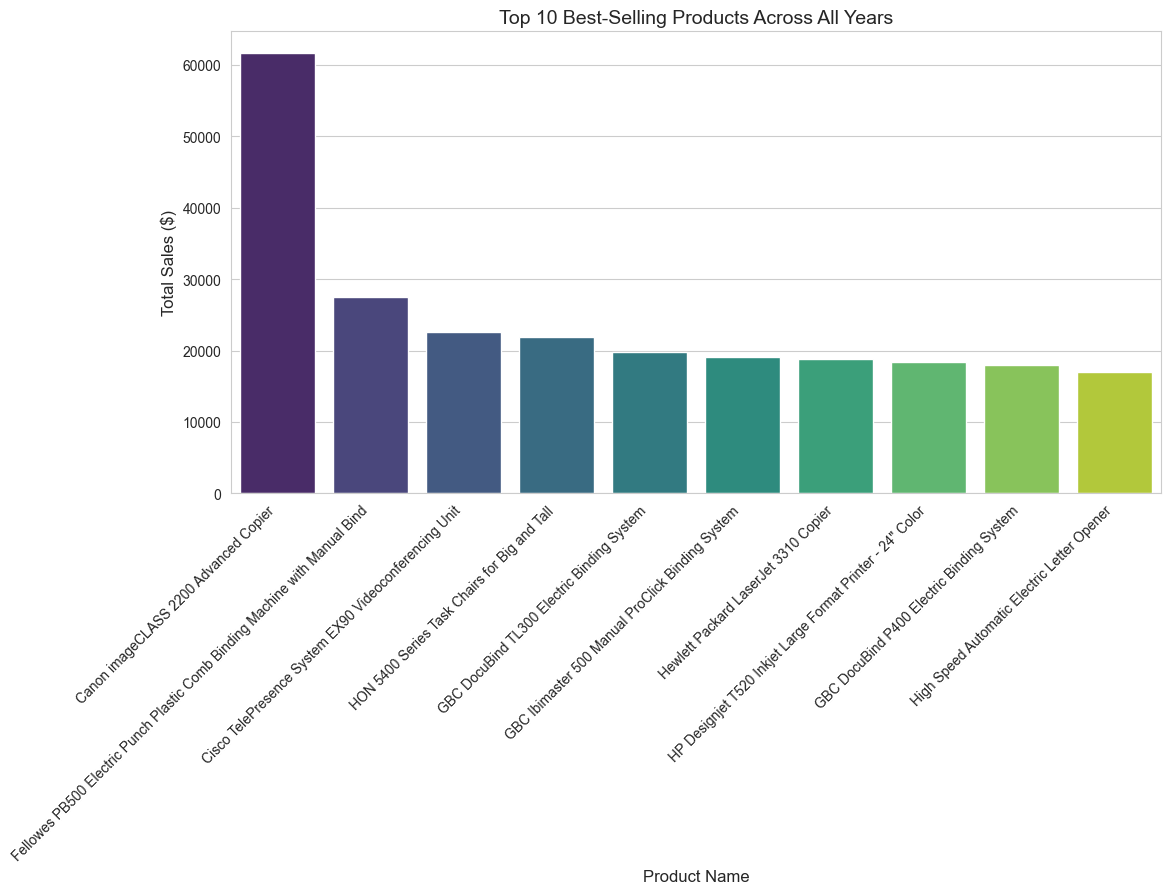

In [17]:
#The Top 10 Revenue Generators You Should Focus On
product_sales = tr.groupby('Product Name')['Sales'].sum().reset_index()
top_products = product_sales.nlargest(10, 'Sales')
plt.figure(figsize=(12, 6))
sns.barplot(x='Product Name', y='Sales', data=top_products, palette='viridis')
plt.title('Top 10 Best-Selling Products Across All Years', fontsize=14)
plt.xlabel('Product Name', fontsize=12)
plt.ylabel('Total Sales ($)', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.show()

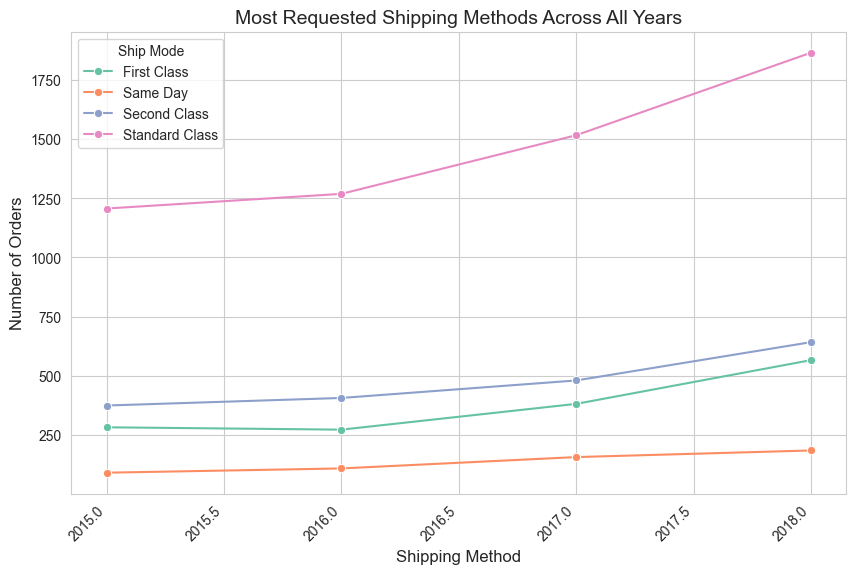

In [18]:
#How Customer Delivery Choices Evolved from 2015-2018
plt.figure(figsize=(10, 6))
shipping_by_year = tr.groupby(['Year_of_order', 'Ship Mode']).size().reset_index(name='Order Count')
sns.lineplot(x='Year_of_order', y='Order Count', hue='Ship Mode', data=shipping_by_year, palette='Set2', marker='o')
plt.title('Most Requested Shipping Methods Across All Years', fontsize=14)
plt.xlabel('Shipping Method', fontsize=12)
plt.ylabel('Number of Orders', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.show()

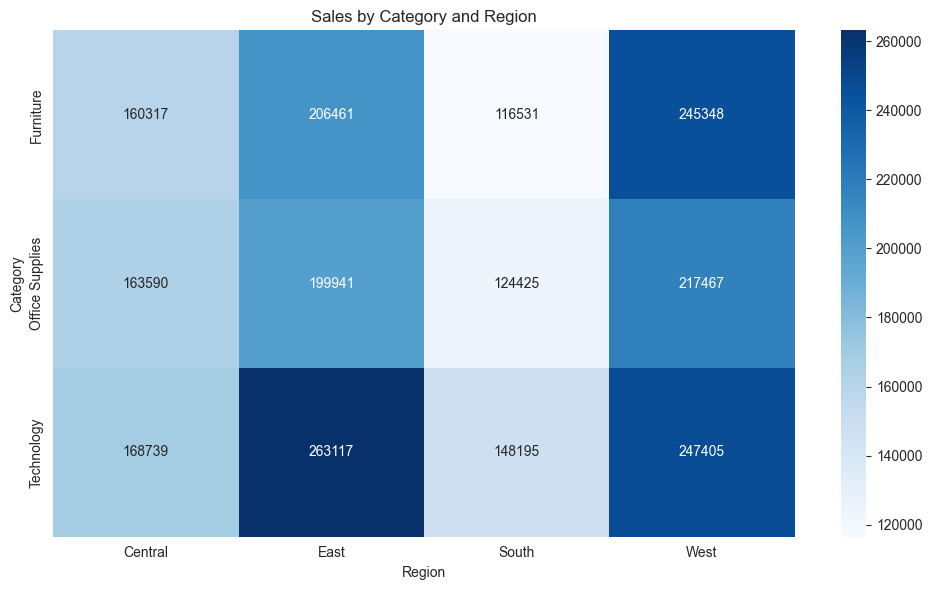

In [19]:
#Exploring Geographic Scope
pivot_table = tr.pivot_table(values='Sales', index='Category', columns='Region', aggfunc='sum')
plt.figure(figsize=(10, 6))
sns.heatmap(pivot_table, annot=True, fmt='.0f', cmap='Blues')
plt.title('Sales by Category and Region')
plt.xlabel('Region')
plt.ylabel('Category')
plt.tight_layout()
plt.show()